In [8]:
from keras.models import Sequential
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *

In [9]:
data_dir = "Testing"
Breast=[]
for file in os.listdir(data_dir):
    Breast+=[file]
print(Breast)
print(len(Breast))

['no_tumor', 'tumor']
2


In [10]:
img_height,img_width=256,256
batch_size=20

# Create an ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



# train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory("Training",
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                )
test_generator = train_datagen.flow_from_directory("Testing",
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                )

Found 2870 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


In [11]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
sensitivity=tf.keras.metrics.SensitivityAtSpecificity(0.1)
specificity=tf.keras.metrics.SpecificityAtSensitivity(0.1)

In [12]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [13]:
# Assuming image size is 64x64 pixels and 3 channels (RGB)
input_shape = (64, 64, 3)

model = Sequential()

# Convolutional layers for spatial feature extraction
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling to reduce spatial dimensions
model.add(GlobalAveragePooling2D())

# Reshape to 3D tensor (batch_size, timesteps, input_features)
model.add(Reshape((1, -1)))

# LSTM layer for capturing temporal dependencies
model.add(LSTM(128, activation='relu'))

# Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_1  (None, 64)                0         
  (GlobalAveragePooling2D)                                       
                                                      

In [14]:
hist=model.fit(train_generator,epochs=15,validation_data=test_generator)

Epoch 1/15
144/144 [==============================] - 317s 2s/step - loss: 0.4434 - accuracy: 0.8620 - val_loss: 1.0285 - val_accuracy: 0.5136
Epoch 2/15
144/144 [==============================] - 293s 2s/step - loss: 0.3604 - accuracy: 0.8662 - val_loss: 1.1614 - val_accuracy: 0.4955
Epoch 3/15
144/144 [==============================] - 288s 2s/step - loss: 0.3466 - accuracy: 0.8662 - val_loss: 1.1538 - val_accuracy: 0.4864
Epoch 4/15
144/144 [==============================] - 292s 2s/step - loss: 0.3414 - accuracy: 0.8638 - val_loss: 1.1391 - val_accuracy: 0.4636
Epoch 5/15
144/144 [==============================] - 283s 2s/step - loss: 0.3381 - accuracy: 0.8659 - val_loss: 1.0325 - val_accuracy: 0.4318
Epoch 6/15
144/144 [==============================] - 304s 2s/step - loss: 0.3354 - accuracy: 0.8697 - val_loss: 0.9925 - val_accuracy: 0.4409
Epoch 7/15
144/144 [==============================] - 328s 2s/step - loss: 0.3248 - accuracy: 0.8711 - val_loss: 1.2162 - val_accuracy: 0.4727

In [15]:
model.save("models/LSTM.h5")

C:\Users\0585\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


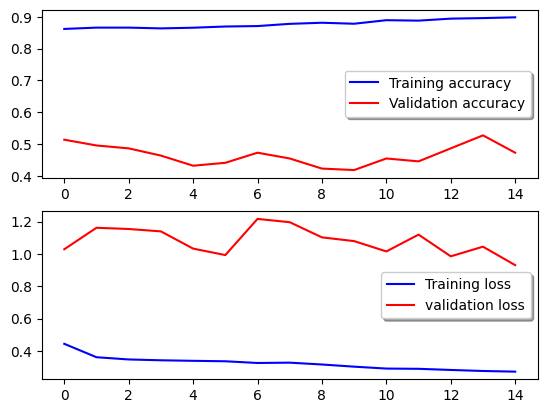

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss")
legend = ax[1].legend(loc='best', shadow=True)

In [17]:
filenames = test_generator.filenames
nb_samples = len(filenames)
model_predict = model.predict_generator(test_generator,steps = nb_samples, verbose=2)

C:\Users\0585\AppData\Local\Temp\ipykernel_2228\281958920.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model_predict = model.predict_generator(test_generator,steps = nb_samples, verbose=2)


220/220 - 12s - 12s/epoch - 54ms/step


Confusion matrix, without normalization
[[57 48]
 [64 51]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

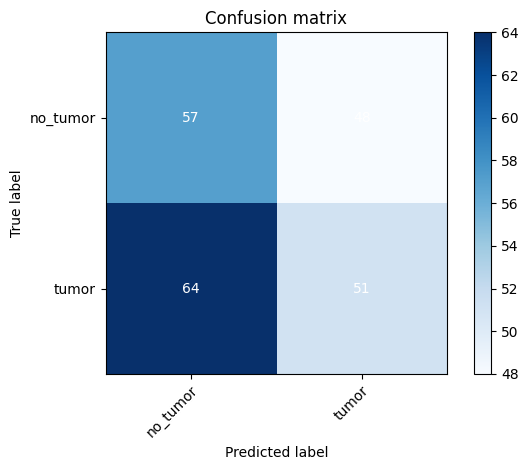

In [18]:
y_true = test_generator.classes
y_pred = model_predict.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred, classes=['no_tumor', 'tumor'],
                      title='Confusion matrix')